Importing Libraries

In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

Loading the Dataset

In [39]:
hdsd = pd.read_csv('healthcare-dataset-stroke-data.csv')

The first 5 rows

In [40]:
hdsd.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Data Analysis and Preprocessing

In [41]:
plot_size = plt.rcParams['figure.figsize']
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams['figure.figsize'] = plot_size

The pie chart showing the smoking_status distribution

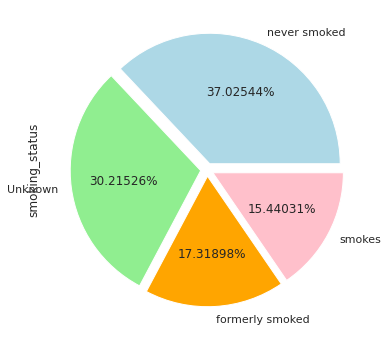

In [42]:
hdsd.smoking_status.value_counts().plot(kind='pie', autopct='%0.05f%%', 
                                        colors = ['lightblue', 'lightgreen', 'orange', 'pink'], 
                                        explode = (0.05, 0.05, 0.05,0.05))

Categorical columns into numeric columns

In [48]:
id = pd.get_dummies(hdsd.id, prefix = 'id')
gender = pd.get_dummies(hdsd.gender, prefix = 'gender')
age = pd.get_dummies(hdsd.age, prefix = 'age')

hypertension = pd.get_dummies(hdsd.hypertension, prefix = 'hypertension')
heart_disease = pd.get_dummies(hdsd.heart_disease, prefix = 'heart_disease')
ever_married = pd.get_dummies(hdsd.ever_married, prefix = 'ever_married')
work_type = pd.get_dummies(hdsd.work_type, prefix = 'work_type')

Residence_type = pd.get_dummies(hdsd.Residence_type, prefix = 'Residence_type')
avg_glucose_level = pd.get_dummies(hdsd.avg_glucose_level, prefix = 'avg_glucose_level')
bmi = pd.get_dummies(hdsd.bmi, prefix = 'bmi')
labels = pd.get_dummies(hdsd.smoking_status, prefix = 'condition')
stroke = pd.get_dummies(hdsd.stroke, prefix = 'stroke')

To create feature set

In [49]:
X = pd.concat([id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type,
               avg_glucose_level, bmi, stroke], axis = 1)

Label columns

In [50]:
labels.head()

,condition_Unknown,condition_formerly smoked,condition_never smoked,condition_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


Convert labels into a numpy array 

In [51]:
y = labels.values

Split the dataset into training and test sets

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 42)

Model training

Build the train

In [53]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

The next step is to create our classification model

In [54]:
input_layer = Input(shape = X.shape[1],)
dense_layer_1 = Dense(15, activation = 'relu')(input_layer)
dense_layer_2 = Dense(10, activation = 'relu')(dense_layer_1)
output = Dense(y.shape[1], activation = 'softmax')(dense_layer_2)

model = Model(inputs = input_layer, outputs = output)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

The model summary

In [55]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9629)]            0         
_________________________________________________________________
dense (Dense)                (None, 15)                144450    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 144,654
Trainable params: 144,654
Non-trainable params: 0
_________________________________________________________________
None


To train the model

In [57]:
history = model.fit(X_train, y_train, batch_size = 8, epochs = 50, verbose = 1, validation_split = 0.2)

Epoch 1/50
507/507 [==============================] - 3s 6ms/step - loss: 1.2544 - acc: 0.4386 - val_loss: 1.1945 - val_acc: 0.4734
Epoch 2/50
507/507 [==============================] - 3s 6ms/step - loss: 1.1033 - acc: 0.5111 - val_loss: 1.1867 - val_acc: 0.4704
Epoch 3/50
507/507 [==============================] - 3s 5ms/step - loss: 0.8676 - acc: 0.6500 - val_loss: 1.2669 - val_acc: 0.4477
Epoch 4/50
507/507 [==============================] - 3s 5ms/step - loss: 0.4684 - acc: 0.8703 - val_loss: 1.4343 - val_acc: 0.4260
Epoch 5/50
507/507 [==============================] - 4s 7ms/step - loss: 0.1914 - acc: 0.9798 - val_loss: 1.6300 - val_acc: 0.3886
Epoch 6/50
507/507 [==============================] - 3s 5ms/step - loss: 0.0717 - acc: 0.9978 - val_loss: 1.7564 - val_acc: 0.3915
Epoch 7/50
507/507 [==============================] - 3s 5ms/step - loss: 0.0272 - acc: 0.9995 - val_loss: 1.8955 - val_acc: 0.3856
Epoch 8/50
507/507 [==============================] - 3s 6ms/step - loss: 0.